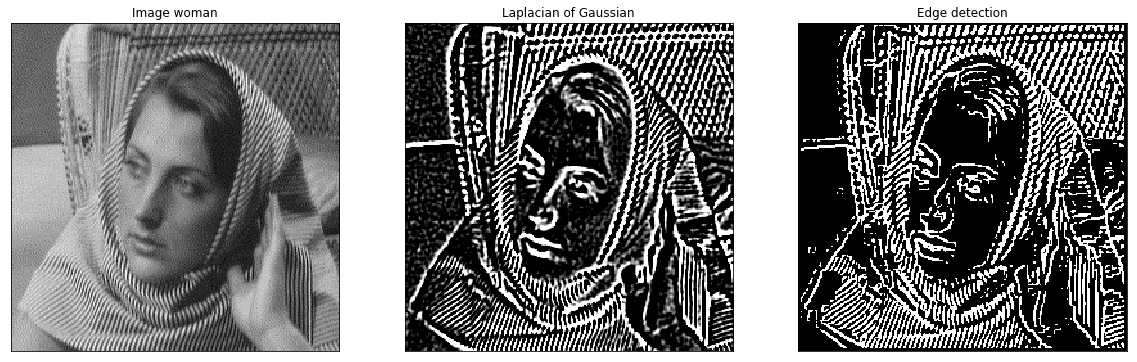

In [5]:
#1)Apply a 5x5 Laplacian of Gaussian edge detector to the image 'woman'.

import numpy as np
import cv2
import matplotlib.pyplot as plt

#reading image
img_woman = cv2.imread('woman.png')

#applying gaussian filter on image
gf_img_woman = cv2.GaussianBlur(img_woman,(5,5),0)

#converting image to grayscale
gf_img_woman = cv2.cvtColor(gf_img_woman,cv2.COLOR_BGR2GRAY)

#applying Laplacian
I_lap = cv2.Laplacian(gf_img_woman, cv2.CV_8U, ksize=5)

N,M = I_lap.shape
thresh = 0.75*np.max(I_lap)
thresh_img = np.zeros(shape = (N,M), dtype = np.uint8)

for i in range(2, N-2):
    for j in range(2, M-2):
        patch = I_lap[i-2:i+3,j-2:j+3]
        pixel = I_lap[i,j]
        max_pixel = patch.max()
        min_pixel = patch.min()
        
        if(pixel >0):
            zeroCross = True if min_pixel < 0 else False
        
        else: 
            zeroCross = True if max_pixel > 0 else False
            
        if(max_pixel - min_pixel) > thresh and zeroCross:
            thresh_img[i,j] = 255
      
#displaying images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_woman, cmap="gray"), plt.title("Image woman"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_lap, cmap="gray"), plt.title("Laplacian of Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresh_img, cmap="gray"), plt.title("Edge detection"), plt.xticks([]), plt.yticks([])
plt.show()